In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
teta = 10
quantity = 100

selection_related = (1 - np.random.rand(quantity)) ** (1/(1 - teta))
selection_related.sort()
print(selection_related)

selection = (1 - np.random.rand(quantity)) ** (1/(1 - teta))
selection.sort()
print(selection)

[1.00107658 1.00177136 1.00376694 1.00401805 1.00432945 1.00611522
 1.0063124  1.00898564 1.01041996 1.01066155 1.01301852 1.01319581
 1.01395779 1.01446259 1.02040899 1.02183082 1.02246142 1.02514965
 1.02588614 1.02592873 1.02769915 1.03141635 1.03152135 1.03215424
 1.03219506 1.03288455 1.03644156 1.03672087 1.03829668 1.03961827
 1.04050897 1.04147312 1.0435717  1.04932953 1.0501179  1.05014001
 1.05110116 1.05145115 1.0563031  1.06031405 1.0608722  1.06639168
 1.06663324 1.06875052 1.06895312 1.07039899 1.07578982 1.07965456
 1.0808965  1.08628143 1.08685145 1.08730698 1.09030617 1.09165755
 1.09335775 1.09421774 1.09587924 1.09602481 1.10007219 1.10056822
 1.10412553 1.10495113 1.1066461  1.11835473 1.12153648 1.12580864
 1.1290088  1.13286713 1.13551177 1.13551987 1.13691518 1.13902054
 1.145887   1.15139476 1.1600608  1.1621565  1.16369231 1.16898395
 1.19305644 1.19342748 1.20712961 1.21689633 1.22245001 1.22859886
 1.23956663 1.24160591 1.24182832 1.26388634 1.26742371 1.2868

In [34]:
def get_bootstrap_sample(x, B_sample = 1000):
    N = len(x)
    result = list()
    for i in range (B_sample):
        sample = np.random.choice(x, size = N, replace = True)
        if (B_sample == 1):
            sample = sample.T[0]
        result.append(sample)
    return result

In [35]:
def teta_waved(selection, quantity):
    sum = 0
    for i in range(quantity):
        sum += np.log(selection[i])
    return len(selection) / sum + 1

#d) Вычисляем доверительные интервалы для доверительной вероятности 0.95

Доверительный интервал для медианы

In [36]:
def median_confidence_interval(selection):
    teta_w = teta_waved(selection_related, quantity)
    left_part = (-1.96 * np.log(2) * (2 ** (1 / (teta_w - 1)))) / ((teta_w - 1)  * quantity ** (1/2)) + 2 ** (1 / (teta_w - 1))
    right_part = (1.96 * np.log(2) * (2 ** (1 / (teta_w - 1)))) / ((teta_w - 1)  * quantity ** (1/2)) + 2 ** (1 / (teta_w - 1))
    print('Доверительный интервал для медианы: ', left_part, '< teta <', right_part)
    print('Длина доверительного интервала: ', right_part - left_part)
    return left_part, right_part
median_confidence_interval(selection)

Доверительный интервал для медианы:  1.0654426194381026 < teta < 1.0989537208156097
Длина доверительного интервала:  0.033511101377507124


(1.0654426194381026, 1.0989537208156097)

Асимптотический доверительный интервал

In [37]:
def asymptotic_confidence_interval(selection):
    teta_w = teta_waved(selection, quantity)
    left_part = -1.96 * (teta_w - 1) / (quantity ** 1/2) + teta_w
    right_part = 1.96 * (teta_w - 1) / (quantity ** 1/2) + teta_w
    print('Асимптотический доверительный интервал: ', left_part, "< teta <", right_part)
    print('Длина доверительного интервала: ', right_part - left_part)
    return left_part, right_part
asymptotic_confidence_interval(selection)

Асимптотический доверительный интервал:  8.70656200075054 < teta < 9.3354071931515
Длина доверительного интервала:  0.6288451924009593


(8.70656200075054, 9.3354071931515)

#t) Строим бутстраповский доверительный интервал

Бутстраповский параметрический доверительный интервал

In [38]:
def bootstrap_parametric(selection):
    real_teta = teta_waved(selection, quantity)
    teta = real_teta
    n = 100
    current_selection = list()
    current_selection_grade = list()
    for i in range(50000):
        current_selection.append(np.random.uniform(teta, 2 * teta, n))
        current_selection_grade.append(teta_waved(current_selection[i], quantity))
    current_selection_grade = np.array(current_selection_grade)
    current_selection_grade.sort()
    k1 = 1249
    k2 = 48749
    left_part = current_selection_grade[k1]
    right_part = current_selection_grade[k2]
    print('Бутстраповский параметрический доверительный интервал: ', left_part, '< teta <', right_part)
    print('Длина бутстраповского параметрического доверительного интервала: ', right_part - left_part)
    return left_part, right_part
bootstrap_parametric(selection)

Бутстраповский параметрический доверительный интервал:  1.38109479654221 < teta < 1.39257049138681
Длина бутстраповского параметрического доверительного интервала:  0.011475694844599982


(1.38109479654221, 1.39257049138681)

Бутстраповский непараметрический доверительный интервал

In [39]:
def bootstrap_nonparametric(selection):
    real_teta = teta_waved(selection, quantity)
    current_selection = np.array(get_bootstrap_sample(selection))
    bootstrap_teta = list()
    for i in range(1000):
        bootstrap_teta.append(teta_waved(current_selection[i], quantity))
    bootstrap_teta = np.array(bootstrap_teta)
    delta = bootstrap_teta - real_teta
    delta.sort()
    k1 = 24
    k2 = 974
    right_part = real_teta - delta[k1]
    left_part = real_teta - delta[k2]
    print('Бутстраповский непараметрический доверительный интервал: ', left_part, '< teta <', right_part)
    print('Длина бутстраповского непараметрического доверительного интервала: ', right_part - left_part)
    return left_part, right_part
bootstrap_nonparametric(selection)

Бутстраповский непараметрический доверительный интервал:  7.031001054625733 < teta < 10.463749137103687
Длина бутстраповского непараметрического доверительного интервала:  3.4327480824779535


(7.031001054625733, 10.463749137103687)

#f) Сравниваем получившиеся интервалы

Доверительный интервал для медианы:  1.0654426194381026 < teta < 1.0989537208156097
Длина доверительного интервала:  0.033511101377507124
Асимптотический доверительный интервал:  8.70656200075054 < teta < 9.3354071931515
Длина доверительного интервала:  0.6288451924009593
Бутстраповский параметрический доверительный интервал:  1.3810289329466634 < teta < 1.3925679027299092
Длина бутстраповского параметрического доверительного интервала:  0.011538969783245756
Бутстраповский непараметрический доверительный интервал:  7.025844715557195 < teta < 10.464610167554934
Длина бутстраповского непараметрического доверительного интервала:  3.438765451997739


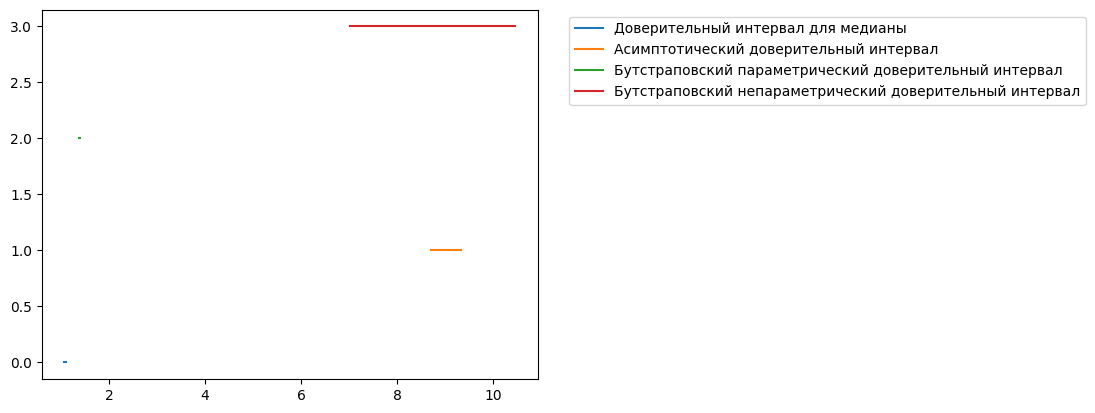

In [40]:
plt.plot(median_confidence_interval(selection), (0, 0), label= "Доверительный интервал для медианы")
plt.plot(asymptotic_confidence_interval(selection), (1, 1), label= "Асимптотический доверительный интервал")
plt.plot(bootstrap_parametric(selection), (2, 2), label= "Бутстраповский параметрический доверительный интервал")
plt.plot(bootstrap_nonparametric(selection), (3, 3), label= 'Бутстраповский непараметрический доверительный интервал')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')